### Question-1: 
### Explain dimension reduction in machine learning

The number of input features, variables, or columns present in a given dataset is known as dimensionality, and the process to reduce these features is called <b>dimensionality reduction.</b></br>

<b>"It is a way of converting the higher dimensions dataset into lesser dimensions dataset ensuring that it provides similar information with minimum data loss."</b>
<img src='https://miro.medium.com/max/1500/1*S7bpbLCiMZA7-5cMSHLhCg.png' alt='dimensionality reduction'/>

### Why we need dimensionality reduction?

*    <b>Less computation and memory : </b>Suppose we have 1000 features and 1 million data points. Let’s say we want to store it in a matrix having cells 1000 * 1 million = 1000 million cells. Which is terrific especially when we have memory constraints. It is good that we have collected huge amount of data to tackle the problems, but handling and applying models to such data is not that much easy. That is where Dimensionality Reduction comes into play. 
*    <b> Influence of irrelavant data : </b>Also not everything we collected will be useful. For example, take a task of height predictions with features weight, country, diet, hair color, eye color. Here features like hair color, eye color has no direct impact(should be selected under domain expert) on defining heights and such features will never give us useful insights in making good performance of predicative modeling. In such cases we can discard those features.
*    <b>Data Redundancy : </b>Having more dimensions will increase the risk of feature correlation.
*    Data analysis will become a challenge. Processing and making effective analysis on each feature will be very difficult in case of high dimensions.
*    <b> Data Visulization : </b>Reduced dimensions of features of the dataset help in visualizing the data.
*    If the dimensionality of input datset increases, any machine learning algorithm and model becomes complex and also increases the chance of overfitting and results in poor performance. This problem is commonly known as <b>curse of dimensionality</b>. 

### Handling Dimensionality Reduction:

Dimensionality reduction can be done in two ways:
1. Feature Selection
2. Feature Extraction

### Feature Selection
Feature selection is the process of selecting the subset of the relevant features and leaving out the irrelevant features

There are three possible ways of doing this:<br>
I) <b>Filter Methods</b><br>
In this method, the dataset is filtered, and a subset that only contains the relevant features is taken while discarding the unrelevant filters.<br>
Some common techniques used are<br>
a) Missing Value Ratio<br>
b) Low variance Filter<br>
c) High correlation Filter<br>
d) Factor Analysis<br>

II) <b>Wrapper Methods</b><br>
It has the same goal as filter method, but it takes a machine learning algorithm for its evaluation.<br>
Some common techniques used are<br>
a) Stepwise forward selection or Forward Feature selection<br>
b) Stepwise backward selection or Backward Feature selection<br>
c) Combination of Forward and Backward feature selection or bi-directional Elimination<br>
d) Random Forests<br>
c) Auto Encoder<br>

III) <b>Embedded Methods</b><br>
It evaluates the importance of each feature by using different iterations of machine learning<br>
Some common techniques used are<br>
a) LASSO<br>
b) Elastic Net<br>
c) Ridge Regression<br>

### Feature Extraction
This reduces the data in a high dimensional space to a lower dimension space, i.e. a space with lesser no. of dimensions.<br>
Some common techniques used are<br>
a) Principal Component Analysis(PCA)<br>
b) Kernel PCA<br>
c) Linear Discriminant Analysis(LDA)<br>
d) Generalized Discriminant Analysis(GDA)<br>
e) T distributed Stochastic neighbourhood Embedding(T-SNE)<br>

### Disadvantages of dimensionality reduction:

Dimensionality reduction also have some disadvantages.
*    Some data may be lost due to dimensionality reduction. This problem can be solved by taking help of domain expert while discarding features.
*    There is no standard way to know the number of features to be discarded. This one completely depends on the problem statement and on the data.

In [2]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# load dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/horse-colic.csv'
dataframe = pd.read_csv(url, header=None, na_values='?')

In [8]:
dataframe.head(5)

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,2.0,1,530101,38.5,66.0,28.0,3.0,3.0,NaN,2.0,...,45.0,8.4,NaN,NaN,2.0,2,11300,0,0,2
1,1.0,1,534817,39.2,88.0,20.0,NaN,NaN,4.0,1.0,...,50.0,85.0,2.0,2.0,3.0,2,2208,0,0,2
2,2.0,1,530334,38.3,40.0,24.0,1.0,1.0,3.0,1.0,...,33.0,6.7,NaN,NaN,1.0,2,0,0,0,1
3,1.0,9,5290409,39.1,164.0,84.0,4.0,1.0,6.0,2.0,...,48.0,7.2,3.0,5.3,2.0,1,2208,0,0,1
4,2.0,1,530255,37.3,104.0,35.0,NaN,NaN,6.0,2.0,...,74.0,7.4,NaN,NaN,2.0,2,4300,0,0,2


### Missing Value Ratio

In [4]:
def MissingValueRatio(dataframe):
    """Taking features which have more than 20% of missing values"""
    percent = dataframe.isnull().sum()/dataframe.shape[0]*100
    column=dataframe.columns
    _columns=[]
    for i in range(len(column)):
        if percent[i]>20:     # columns have greater than 20% of missing values
            _columns.append(column[i])
    print(_columns)
    new_dataframe = pd.DataFrame()
    for i in dataframe.columns:
        if i not in _columns:
            new_dataframe[i]=dataframe[i]
    return new_dataframe
# Printing column names Columns
new_dataframe=MissingValueRatio(dataframe)

[7, 13, 14, 15, 16, 17, 20, 21]


As there are more missing values (threshold of 20%) we can discard these values.

### Low Variance Filter

In [5]:
def LowVarianceFilter():
    variance=list(new_dataframe.var())
    columns=list(new_dataframe.columns)
    for i in range(len(variance)-1):
        for j in range(len(variance)-1):
            if variance[j]>variance[j+1]:
                variance[j],variance[j+1]=variance[j+1],variance[j]
                columns[j],columns[j+1]=columns[j+1],columns[j]
    for i in range(len(variance)):
        print("Feature=>",columns[i],", Variance=>",variance[i])
    dataframe = pd.DataFrame()
    for i in sorted(columns[7:]):
        dataframe[i]=new_dataframe[i]
    return dataframe
new_dataframe=LowVarianceFilter()

Feature=> 27 , Variance=> 0.2218394648829427
Feature=> 9 , Variance=> 0.22812901783218667
Feature=> 23 , Variance=> 0.23209587513935376
Feature=> 0 , Variance=> 0.24039864425040888
Feature=> 3 , Variance=> 0.5362466875871686
Feature=> 22 , Variance=> 0.5434445915916574
Feature=> 11 , Variance=> 0.9540287990196078
Feature=> 6 , Variance=> 1.0921372191863987
Feature=> 12 , Variance=> 1.1345038116440658
Feature=> 10 , Variance=> 1.710705921712949
Feature=> 8 , Variance=> 2.6253529079615965
Feature=> 1 , Variance=> 4.726153846153814
Feature=> 18 , Variance=> 108.56253245865784
Feature=> 5 , Variance=> 311.24832824663054
Feature=> 19 , Variance=> 754.8761454197289
Feature=> 4 , Variance=> 819.7087747035575
Feature=> 26 , Variance=> 16265.60333333334
Feature=> 25 , Variance=> 421940.18925307016
Feature=> 24 , Variance=> 29154746.179531775
Feature=> 2 , Variance=> 2340290821346.6084


feature-27,9,23,0,3,22,11 have low variance compared to others so we can discard these features.

### High Correlation Filter

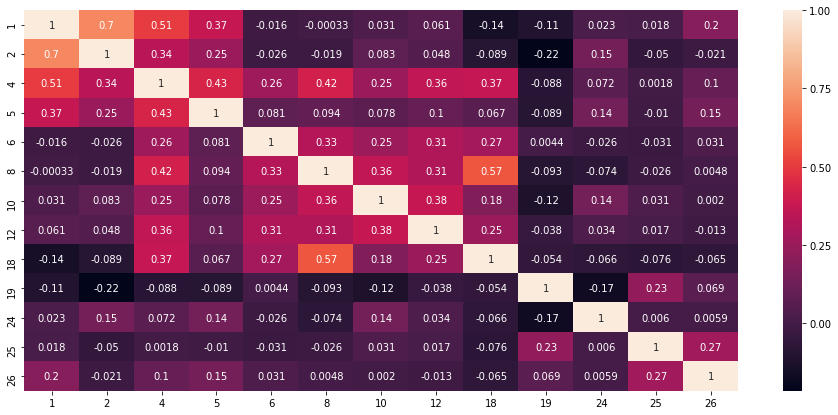

In [6]:
def HighCorrelationFilter():
    plt.figure(figsize=(16,7))
    new_dataframe.fillna(new_dataframe.median(), inplace=True)
    ax=sns.heatmap(new_dataframe.corr(),annot=True)
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    plt.show()
HighCorrelationFilter()

We can see that feature-2,8,1,19,24 are highly correlated with features-1,18,4,2,19. Hence we can discard features which have low variance (features-1,8,19).

In [26]:
from sklearn.datasets import load_iris
import numpy as np
iris = load_iris()
iris.data.shape

(150, 4)

### Forward Feature Selection:

In [62]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

estimator = ExtraTreesClassifier()
featureSelection = SelectFromModel(estimator)
featureSelection.fit(iris.data, iris.target)

c:\python3.7.4\python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


SelectFromModel(estimator=ExtraTreesClassifier(bootstrap=False,
                                               class_weight=None,
                                               criterion='gini', max_depth=None,
                                               max_features='auto',
                                               max_leaf_nodes=None,
                                               min_impurity_decrease=0.0,
                                               min_impurity_split=None,
                                               min_samples_leaf=1,
                                               min_samples_split=2,
                                               min_weight_fraction_leaf=0.0,
                                               n_estimators='warn', n_jobs=None,
                                               oob_score=False,
                                               random_state=None, verbose=0,
                                               warm_start=False),
       

In [63]:
data = iris.data
selectedFeatures = featureSelection.transform(data)
featureSelection.get_support()

array([False, False,  True,  True])

Feature-3,4 ['Petal Length','Petal Width'] have more importance than other features.

### Backward Feature Selection

In [65]:
from sklearn.feature_selection import RFE
featureSelection = RFE(estimator)
featureSelection.fit(iris.data, iris.target)

c:\python3.7.4\python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\python3.7.4\python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\python3.7.4\python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RFE(estimator=ExtraTreesClassifier(bootstrap=False, class_weight=None,
                                   criterion='gini', max_depth=None,
                                   max_features='auto', max_leaf_nodes=None,
                                   min_impurity_decrease=0.0,
                                   min_impurity_split=None, min_samples_leaf=1,
                                   min_samples_split=2,
                                   min_weight_fraction_leaf=0.0,
                                   n_estimators='warn', n_jobs=None,
                                   oob_score=False, random_state=None,
                                   verbose=0, warm_start=False),
    n_features_to_select=None, step=1, verbose=0)

In [67]:
data = iris.data
selectedFeatures = featureSelection.transform(data)
featureSelection.ranking_

array([2, 3, 1, 1])

Feature-3,4 ['Petal Length','Petal Width'] have more importance than other features.

### Random Forests:

In [71]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

randomForestClassifier = RandomForestClassifier()
randomForestClassifier.fit(iris.data, iris.target)

c:\python3.7.4\python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [73]:
columns=['Sepal Length','Sepal Width','Petal Length','Petal Width']
for feature in zip(columns, randomForestClassifier.feature_importances_):
    print(feature)

('Sepal Length', 0.056612626976374016)
('Sepal Width', 0.015428570350549476)
('Petal Length', 0.4901347189116617)
('Petal Width', 0.4378240837614148)


In [75]:
from sklearn.datasets import make_regression
# define dataset
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)
# summarize the dataset
print(X.shape, y.shape)

(1000, 10) (1000,)


### LASSO

In [77]:
from sklearn.linear_model import Lasso # L1 regularization
model = Lasso()
rfe = RFE(estimator=model, n_features_to_select=5) #recursive feature elimination

In [82]:
rfe.fit(X,y)
selectedFeatures=rfe.transform(X)
rfe.get_support()

array([False,  True, False, False,  True,  True,  True,  True, False,
       False])

feature-2,5,6,7,8 have more importance than other features.

### Ridge

In [83]:
from sklearn.linear_model import Ridge # L2 Regularization
model = Ridge()
rfe = RFE(estimator=model, n_features_to_select=5)

In [84]:
rfe.fit(X,y)
selectedFeatures=rfe.transform(X)
rfe.get_support()

array([False,  True, False, False,  True,  True,  True,  True, False,
       False])

feature-2,5,6,7,8 have more importance than other features.

### ElasticNet

In [85]:
from sklearn.linear_model import ElasticNet # Both L1&L2 Regularization
model = ElasticNet()
rfe = RFE(estimator=model, n_features_to_select=5)

In [86]:
rfe.fit(X,y)
selectedFeatures=rfe.transform(X)
rfe.get_support()

array([False,  True, False, False,  True,  True,  True,  True, False,
       False])

feature-2,5,6,7,8 have more importance than other features.

## Data Visualization through dimensionality reduction

### Factor Analysis

In [49]:
from sklearn.decomposition import FactorAnalysis
FA = FactorAnalysis(n_components = 3).fit_transform(iris.data)

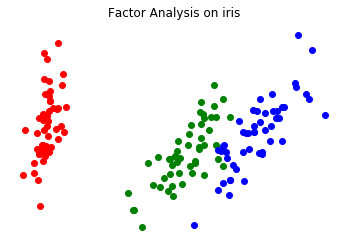

In [50]:
plt.scatter(FA[iris.target==0, 0], FA[iris.target==0, 1], color='r')
plt.scatter(FA[iris.target==1, 0], FA[iris.target==1, 1], color='g') 
plt.scatter(FA[iris.target==2, 0], FA[iris.target==2, 1], color='b') 
plt.title('Factor Analysis on iris')
plt.axis('off')
plt.show()

### T-SNE

In [31]:
from sklearn.manifold import TSNE 
tsne = TSNE(n_components=2).fit_transform(iris.data)

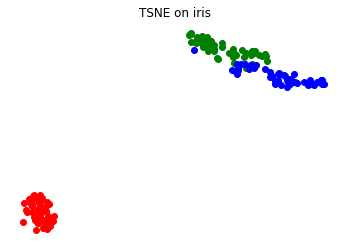

In [36]:
plt.scatter(tsne[iris.target==0, 0], tsne[iris.target==0, 1], color='r')
plt.scatter(tsne[iris.target==1, 0], tsne[iris.target==1, 1], color='g') 
plt.scatter(tsne[iris.target==2, 0], tsne[iris.target==2, 1], color='b') 
plt.title('TSNE on iris')
plt.axis('off')
plt.show()

### PCA

In [37]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(iris.data)

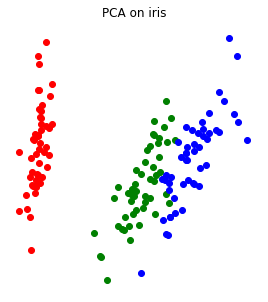

In [38]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(pca_result[iris.target==0, 0], pca_result[iris.target==0, 1], color='r')
plt.scatter(pca_result[iris.target==1, 0], pca_result[iris.target==1, 1], color='g') 
plt.scatter(pca_result[iris.target==2, 0], pca_result[iris.target==2, 1], color='b') 
plt.title('PCA on iris')
plt.axis('off')
plt.show()

### LDA

In [41]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=2)
lda_result = lda.fit_transform(iris.data, iris.target)

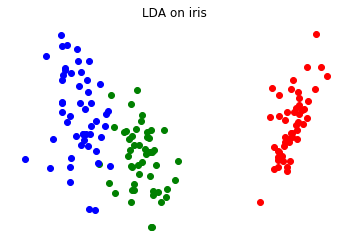

In [43]:
plt.scatter(lda_result[iris.target==0, 0], lda_result[iris.target==0, 1], color='r')
plt.scatter(lda_result[iris.target==1, 0], lda_result[iris.target==1, 1], color='g') 
plt.scatter(lda_result[iris.target==2, 0], lda_result[iris.target==2, 1], color='b') 
plt.title('LDA on iris')
plt.axis('off')
plt.show()

### Truncated SVD:

In [46]:
from sklearn.decomposition import TruncatedSVD 
svd = TruncatedSVD(n_components=2).fit_transform(iris.data)

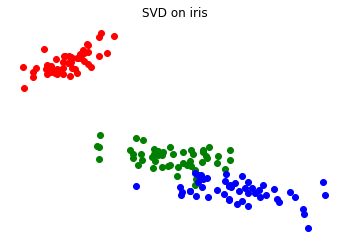

In [48]:
plt.scatter(svd[iris.target==0, 0], svd[iris.target==0, 1], color='r')
plt.scatter(svd[iris.target==1, 0], svd[iris.target==1, 1], color='g') 
plt.scatter(svd[iris.target==2, 0], svd[iris.target==2, 1], color='b') 
plt.title('SVD on iris')
plt.axis('off')
plt.show()

### I have written an indepth blog on dimensionality reduction in medium. 

<b>Blog Link:</b> https://medium.com/analytics-vidhya/a-complete-guide-on-dimensionality-reduction-62d9698013d2

### Question-2:
### How can you handle duplicate values in a dataset for a variable in Python using pandas?

In Python’s Pandas library, Dataframe class provides a member function to find duplicate rows based on all columns or some specific columns i.e.
DataFrame.duplicated(subset=None, keep='first')

It returns a Boolean Series with True value for each duplicated row.

In [92]:
# creating dataframe
Students = [('Varun','CSE','398'),('Harika','ECE','284'),('Bhavani','MECH','263'),('Sudheer','EEE','102'),('Harika','ECE','284'),('Varun','EEE','823'),('Harika','ECE','284')]
data = pd.DataFrame(Students,columns=['Name','Branch','Marks'])
bol = data['Name'].is_unique
if bol:
    print("No duplicates in data")
else:
    print("Duplicate rows exits")

Duplicate rows exits


### Duplicate rows on all columns:

In [90]:
duplicate = data[data.duplicated()]
print("total duplicates : ",data.duplicated().sum())
print(duplicate)

total duplicates :  2
     Name Branch Marks
4  Harika    ECE   284
6  Harika    ECE   284


In [100]:
#Dropping duplicate rows on all columns
d = data.drop_duplicates()
d

,Name,Branch,Marks
0,Varun,CSE,398
1,Harika,ECE,284
2,Bhavani,MECH,263
3,Sudheer,EEE,102
5,Varun,EEE,823


### Duplicate rows on a single variable

In [94]:
duplicate = data[data.duplicated(['Name'])]
print("total duplicates: ",data.duplicated(['Name']).sum())
print(duplicate)

total duplicates:  3
     Name Branch Marks
4  Harika    ECE   284
5   Varun    EEE   823
6  Harika    ECE   284


In [101]:
#Dropping duplicate rows on a single variable
d = data.drop_duplicates(['Name'])
d

,Name,Branch,Marks
0,Varun,CSE,398
1,Harika,ECE,284
2,Bhavani,MECH,263
3,Sudheer,EEE,102


### Duplicate rows on Multiple variables

In [96]:
duplicate = data[data.duplicated(['Name','Branch'])]
print("total duplicates: ",data.duplicated(['Name','Branch']).sum())
print(duplicate)

total duplicates:  2
     Name Branch Marks
4  Harika    ECE   284
6  Harika    ECE   284


In [97]:

d1=data.drop_duplicates()
d1

,Name,Branch,Marks
0,Varun,CSE,398
1,Harika,ECE,284
2,Bhavani,MECH,263
3,Sudheer,EEE,102
5,Varun,EEE,823


In [98]:
d1 = data.drop_duplicates(['Name'])
d1

,Name,Branch,Marks
0,Varun,CSE,398
1,Harika,ECE,284
2,Bhavani,MECH,263
3,Sudheer,EEE,102
